# Exploratory data analysis
On the data, cleaned according to the project requirements, we will perform a small EDA so to understand the key features in the distribution of data. The main purpose are
1) to understand the dataset and stimulate the curiousity
1) to improve predictions by either regression, classification or neural networks.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabular_data import load_airbnb

%matplotlib inline

In [15]:
# load the dataset
df = pd.read_csv('./airbnb-property-listings/tabular_data/clean_tabular_data.csv')
df = df.drop(532)

df_numeric = df.drop(columns=['Unnamed: 0', 'Unnamed: 19']).select_dtypes(include='number')

In [16]:
# plot dataframe shape
df.shape

(889, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 889
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            889 non-null    int64  
 1   ID                    889 non-null    object 
 2   Category              889 non-null    object 
 3   Title                 889 non-null    object 
 4   Description           829 non-null    object 
 5   Amenities             889 non-null    object 
 6   Location              889 non-null    object 
 7   guests                889 non-null    object 
 8   beds                  889 non-null    float64
 9   bathrooms             889 non-null    float64
 10  Price_Night           889 non-null    int64  
 11  Cleanliness_rating    889 non-null    float64
 12  Accuracy_rating       889 non-null    float64
 13  Communication_rating  889 non-null    float64
 14  Location_rating       889 non-null    float64
 15  Check-in_rating       889 no

In [18]:
df.sample(5)

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
596,660,193e1033-39bf-4872-878e-c7b8e7ce0106,Offbeat,"Luxury suite overlooking the Wadden Sea, Harli...",['The luxurious spacious suite is furnished wi...,"['What this place offers', 'Bathroom', 'Hair d...",Harlingen Friesland Netherlands,2,1.0,1.0,233,4.9,4.9,5.0,5.0,5.0,4.7,18.0,https://www.airbnb.co.uk/rooms/42850678?adults...,1,NaN
641,707,7ab66fa5-97c2-4760-810c-0e589d190c80,Offbeat,Alianz Loft,['Insta @ alianzloft. 20 minutes from San Jose...,"['What this place offers', 'Scenic views', 'Ci...",Heredia Costa Rica,4,2.0,2.0,181,4.8,4.9,4.8,4.9,4.9,4.8,61.0,https://www.airbnb.co.uk/rooms/15378037?adults...,2,NaN
872,965,9d996a3b-d814-4c09-bc1c-6a42885d973e,Beachfront,MARINA VISTA THREE SEAFRONT APARTMENT,['Four Exclusive Seafront Apartments available...,"['What this place offers', 'Bathroom', 'Bath',...",Worthing West Sussex United Kingdom,4,2.0,1.0,180,4.9,4.5,4.7,4.9,4.7,4.5,34.0,https://www.airbnb.co.uk/rooms/27415390?adults...,1,NaN
53,61,b28245ee-1a6f-4554-9ae1-6575954aa7ee,Treehouses,The Owl Cabin,['Welcome and enjoy your stay in our perched h...,"['What this place offers', 'Scenic views', 'Ga...",Bastogne Belgium,2,1.0,1.0,135,5.0,4.9,5.0,4.9,5.0,4.7,21.0,https://www.airbnb.co.uk/rooms/42767342?adults...,1,NaN
63,78,650d0048-d0df-48fa-bbbb-8fa656665841,Treehouses,Sulfur Ridge-Tennessee's First Luxury Treehouse ®,['CHECK IN DATES ARE; Friday- three night mini...,"['What this place offers', 'Bathroom', 'Bath',...",Bloomington Springs Tennessee United States,2,1.0,1.0,295,5.0,5.0,5.0,5.0,5.0,4.9,43.0,https://www.airbnb.co.uk/rooms/32265723?adults...,1,NaN


In [19]:
df['Category'].unique()

array(['Treehouses', 'Chalets', 'Amazing pools', 'Offbeat', 'Beachfront'],
      dtype=object)

In [20]:
df.describe()

,Unnamed: 0,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,Unnamed: 19
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,0.0
mean,491.760405,2.392576,1.362205,152.536558,4.852306,4.903262,4.932058,4.903487,4.943307,4.764004,34.767154,NaN
std,282.030376,1.824505,0.817441,127.170901,0.182999,0.135153,0.122274,0.121362,0.103555,0.181982,14.438702,NaN
min,0.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000,NaN
25%,258.000000,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000,NaN
50%,483.000000,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000,NaN
75%,733.000000,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,NaN
max,987.000000,17.000000,10.000000,1132.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,NaN


/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123:

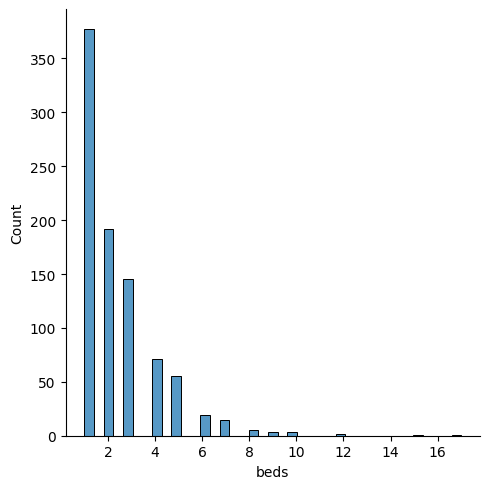

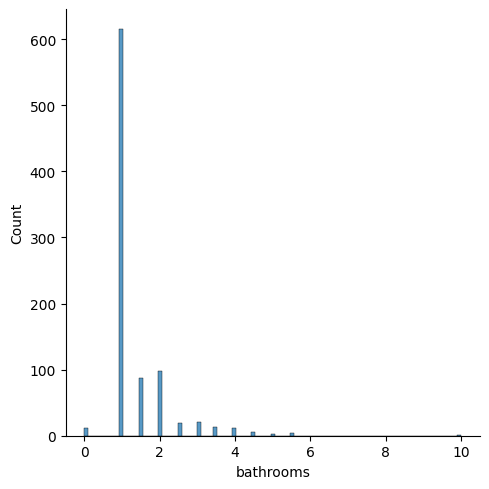

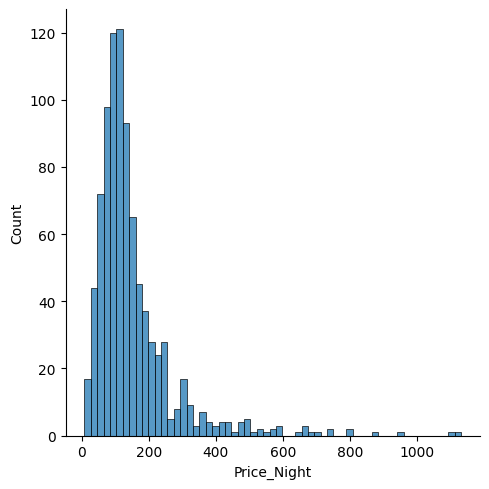

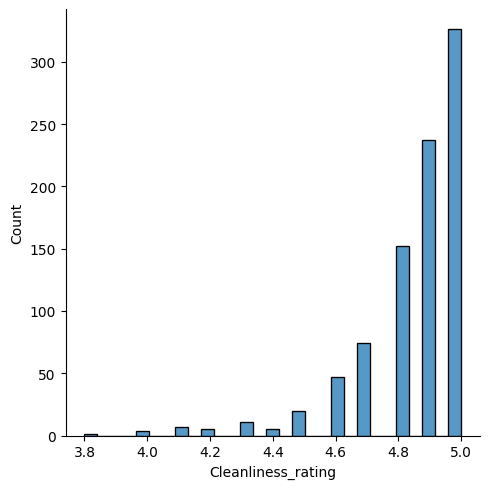

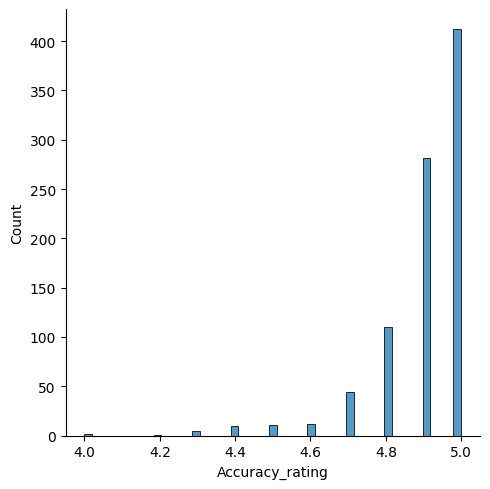

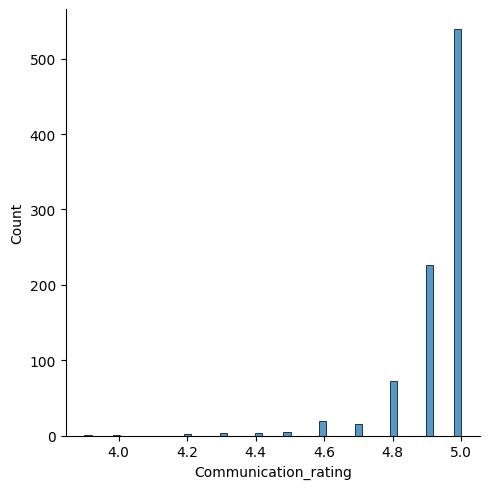

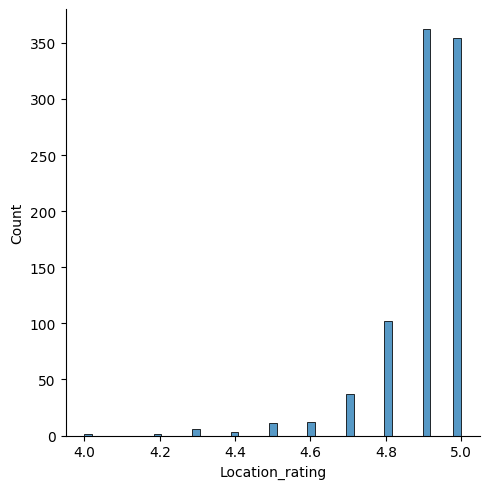

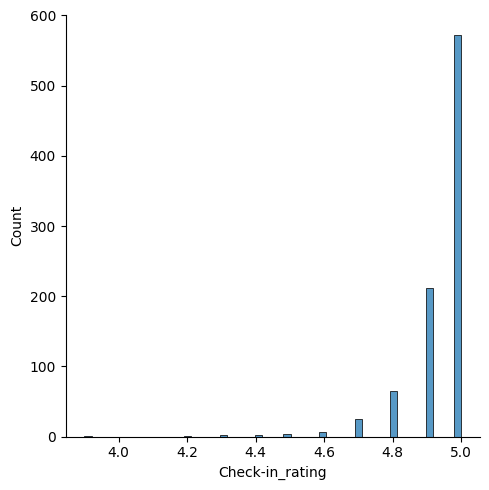

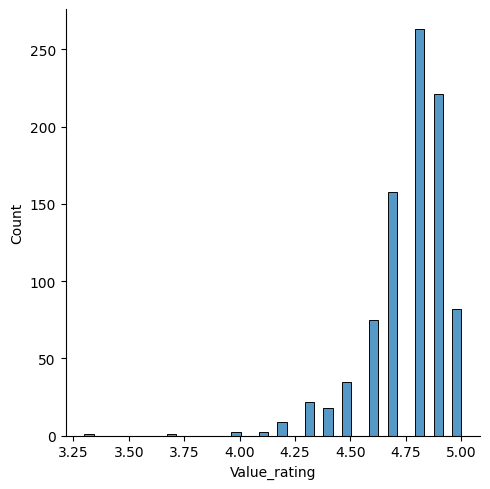

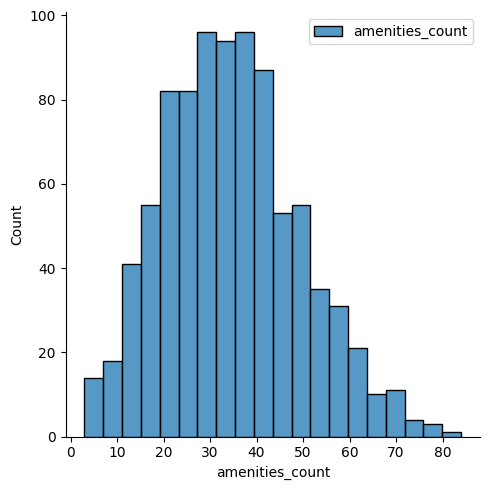

In [21]:
for column in df_numeric.columns:
    sns.displot(df_numeric[column], kde=False, label=column)

plt.legend()
plt.show()

In [22]:
df[df["Cleanliness_rating"]>5]

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19


In [23]:
df["amenities_count"][df["Cleanliness_rating"]>5]

Series([], Name: amenities_count, dtype: float64)

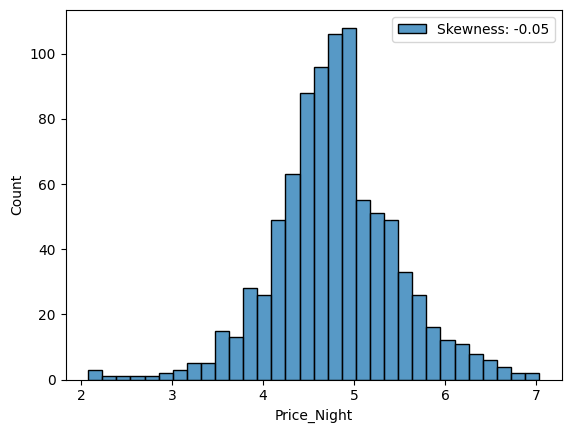

In [24]:
log_price_night = df["Price_Night"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_price_night,label="Skewness: %.2f"%(log_price_night.skew()) )
t.legend()

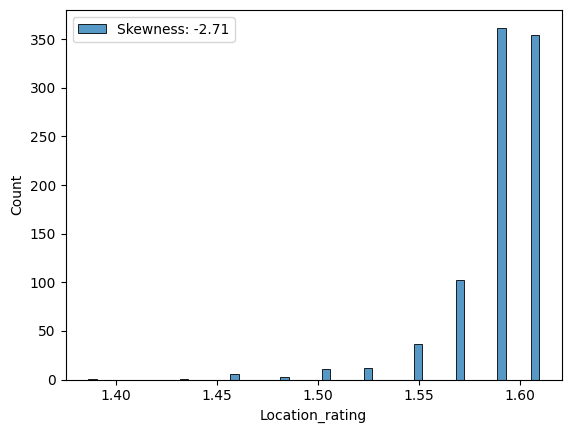

In [26]:
log_location_rating = df["Location_rating"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_location_rating,label="Skewness: %.2f"%(log_location_rating.skew()) )
t.legend()

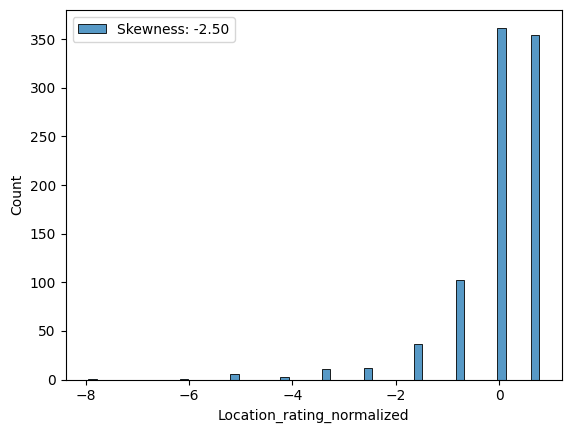

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Location_rating_normalized'] = scaler.fit_transform(df[['Location_rating']].map(lambda i: np.log(i) if i > 0 else 0))
t=sns.histplot(df['Location_rating_normalized'],label="Skewness: %.2f"%(df['Location_rating'].skew()) )
t.legend()
